In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import threading
import sys
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, RationalQuadratic, DotProduct, ExpSineSquared
from sklearn.preprocessing import StandardScaler
import time
from matplotlib import rcParams
rcParams['font.family'] = "Cambria"

Load in Data

In [23]:
#Original Data
df_train = pd.read_csv('train_data_umap.csv')
df_val = pd.read_csv('val_data_umap.csv')
df_test = pd.read_csv('test_data_umap.csv')
Data = pd.read_csv('SCNP_dataset.csv')
Data

,Comp,BID,SID,CID,rg,asph,acyl,anis,num dom,seg,...,eig2,eig3,eig4,eig5,eig6,eig7,eig8,eig9,eig10,n_eig
0,0.1,0.2,0,0,12.228701,61.184513,30.778156,0.212441,2,48,...,0.001016,0.001885,0.004115,0.004368,0.007120,0.008917,0.010192,0.010418,0.012773,0.000021
1,0.1,0.2,0,1,10.906473,45.301393,22.153887,0.183696,1,25,...,0.001981,0.002270,0.003840,0.004823,0.006086,0.007630,0.008078,0.008877,0.012746,0.000039
2,0.1,0.2,0,2,11.597649,51.393123,27.237148,0.188593,2,36,...,0.001227,0.001769,0.003387,0.004120,0.005110,0.005742,0.007127,0.008390,0.012078,0.000030
3,0.1,0.2,0,3,16.041229,155.108298,63.086271,0.407451,4,105,...,0.000499,0.002372,0.003987,0.005094,0.005925,0.007164,0.009113,0.011217,0.012627,0.000008
4,0.1,0.2,0,4,15.312193,139.605066,62.681879,0.410806,6,108,...,0.000487,0.002857,0.003377,0.005003,0.006256,0.006961,0.009035,0.012391,0.014306,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,0.8,0.8,39,19,7.353935,17.969779,10.097279,0.143275,1,4,...,0.005110,0.012039,0.013861,0.024233,0.024647,0.028329,0.041535,0.043056,0.048735,0.000017
7676,0.8,0.8,39,20,7.110865,18.012399,10.576299,0.166412,1,4,...,0.007475,0.012283,0.014657,0.019058,0.027062,0.029793,0.038675,0.041851,0.047963,0.000016
7677,0.8,0.8,39,21,7.068580,12.873496,6.076033,0.082558,1,4,...,0.004853,0.009125,0.019311,0.021287,0.026657,0.030698,0.034977,0.036610,0.048004,0.000028
7678,0.8,0.8,39,22,7.411105,21.967894,12.709280,0.208238,1,4,...,0.005929,0.011884,0.012992,0.019262,0.021154,0.028907,0.034192,0.040488,0.044181,0.000021


Data Visualization

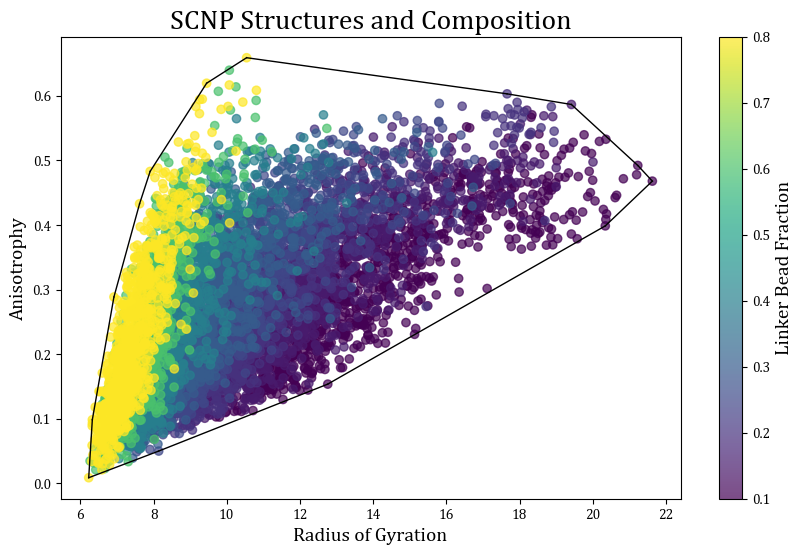

In [24]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg'], Data['anis'], c=Data['Comp'], cmap='viridis', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg'], Data['anis']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Linker Bead Fraction', fontsize = 14)

# Labels and title
plt.xlabel('Radius of Gyration', fontsize = 14)
plt.ylabel('Anisotrophy', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


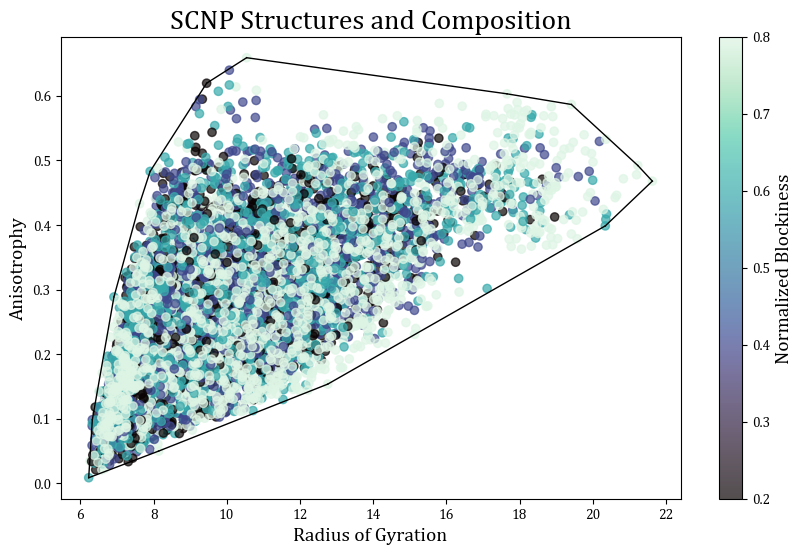

In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['rg'], Data['anis'], c=Data['BID'], cmap='mako', alpha=0.7)

# Compute and draw Convex Hull
points = np.column_stack((Data['rg'], Data['anis']))  # Create (x, y) pairs
hull = ConvexHull(points)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Draw solid black line

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Blockiness', fontsize = 14)

# Labels and title
plt.xlabel('Radius of Gyration', fontsize = 14)
plt.ylabel('Anisotrophy', fontsize = 14)
plt.title('SCNP Structures and Composition', fontsize = 20)

plt.show()


## Prediction Results

Radius of Gyration (Use Matern Kernal with Lengthscale = 1.73333 and nu = 0.25)

In [109]:
# Define the parameter values
length_scale = 1.733333
nu = 0.250000

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "rg_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = Matern(length_scale=length_scale, nu=nu, length_scale_bounds=(1e-3, 1e3))
gpr_rg = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_rg.fit(X_train_scaled, y_train)
y_pred_val = gpr_rg.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Nu": nu,
    "MSE": mse
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


   Length_scale    Nu       MSE
0      1.733333  0.25  0.374393


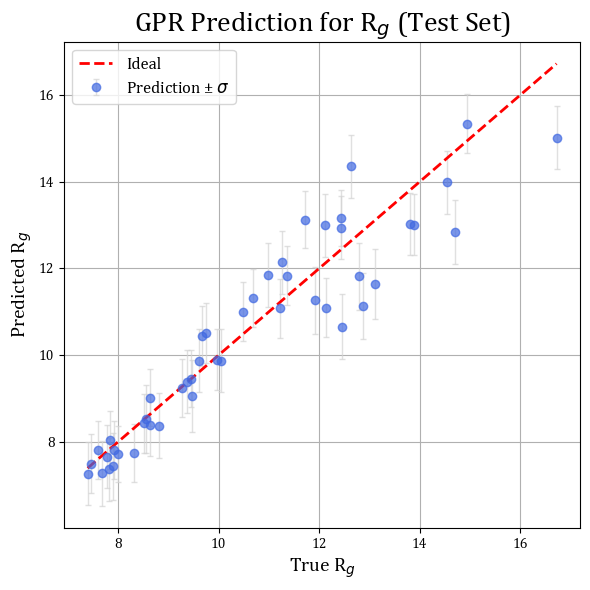

In [ ]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_rg.predict(X_test_scaled, return_std=True)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1, capsize=2, alpha=0.7, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True R$_{g}$", fontsize = 14)
plt.ylabel(r"Predicted R$_{g}$", fontsize = 14)
plt.title(r"GPR Prediction for R$_{g}$ (Test Set)", fontsize = 20)
plt.legend(fontsize =12)
plt.grid(True)
plt.tight_layout()
plt.show()

Anisotropy (Dot product kernel with )

In [107]:
# Dot product Kernel
# Define the parameter ranges
sigma = 8.245333

# ---------- Targets ----------
target = "anis_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = DotProduct(sigma)
gpr_anis = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=20)

gpr_anis.fit(X_train_scaled, y_train)
y_pred_val = gpr_anis.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Sigma": sigma,
    "MSE": mse
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\pt3594\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


      Sigma       MSE
0  8.245333  0.000922


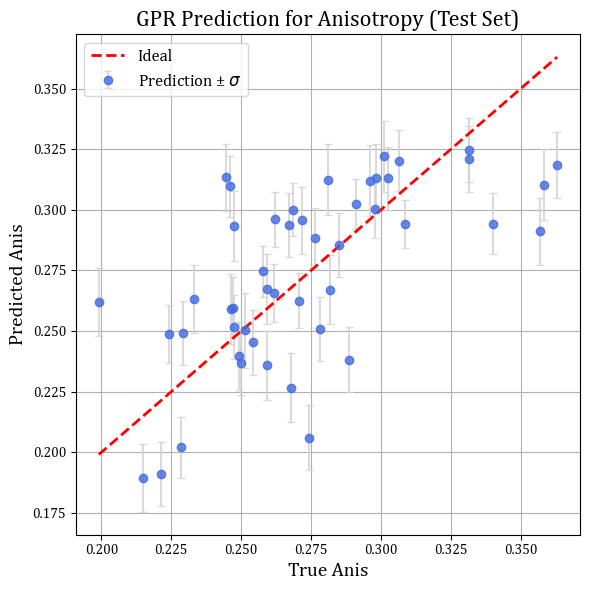

In [ ]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_anis.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Anis", fontsize=14)
plt.ylabel(r"Predicted Anis", fontsize=14)
plt.title(r"GPR Prediction for Anisotropy (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Acylindricity (Rational Quadratic kernel with Lengthscale = 0.595000 and nu = 7.525000)

In [104]:
# Define the parameter values
length_scale = 0.595000
alpha = 7.525000

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "acyl_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = RationalQuadratic(length_scale, alpha)
gpr_acyl = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_acyl.fit(X_train_scaled, y_train)
y_pred_val = gpr_acyl.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Alpha": alpha,
    "MSE": mse
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


   Length_scale  Alpha       MSE
0         0.595  7.525  30.67573


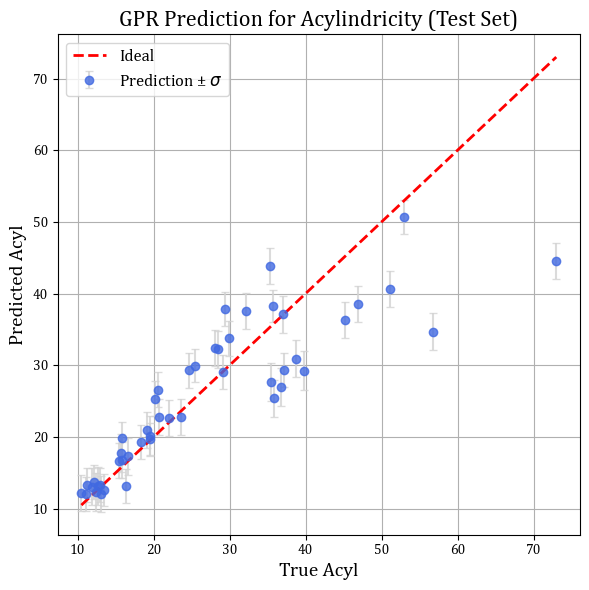

In [ ]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_acyl.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Acyl", fontsize=14)
plt.ylabel(r"Predicted Acyl", fontsize=14)
plt.title(r"GPR Prediction for Acylindricity (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Asphericity (Matern kernel with lengthscale = 2.822222 and nu = 0.25)

In [93]:
# Define the parameter values
length_scale = 2.822222
nu = 0.250000

# ---------- Features ----------
features = ['Comp', 'BID', 'UMAP_0', 'UMAP_1']
X_train = df_train[features]
X_val = df_val[features]

# ---------- Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ---------- Targets ----------
target = "asph_mean"
y_train = df_train[target].values
y_val = df_val[target].values

# Store results
results = []

# Kernel definition
kernel = Matern(length_scale=length_scale, nu=nu, length_scale_bounds=(1e-3, 1e3))
gpr_asph = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=20)

gpr_asph.fit(X_train_scaled, y_train)
y_pred_val = gpr_asph.predict(X_val_scaled)
mse = mean_squared_error(y_val, y_pred_val)

results.append({
    "Length_scale": length_scale,
    "Nu": nu,
    "MSE": mse
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


   Length_scale    Nu         MSE
0      2.822222  0.25  177.874231


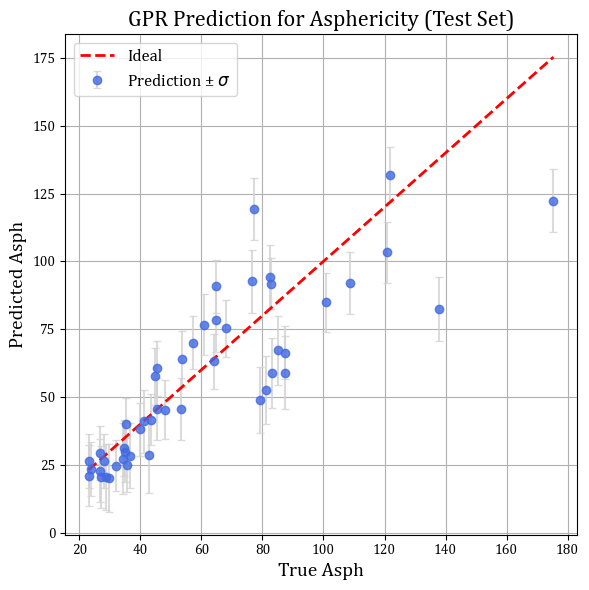

In [ ]:
#Apply trained model on Test dataset!
# ---------- Predict with standard deviation ----------
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
y_test = df_test[target].values
y_pred_test, y_std_test = gpr_asph.predict(X_test_scaled, return_std=True)

# Ensure everything is numpy array
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
y_std_test = np.asarray(y_std_test)

# ---------- Plot with confidence intervals ----------
plt.figure(figsize=(6, 6))
plt.errorbar(
    y_test, y_pred_test, yerr=y_std_test,
    fmt='o', color='royalblue', ecolor='lightgray', elinewidth=1.5, capsize=3,
    alpha=0.8, label=r"Prediction ± $\sigma$"
)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Ideal")

plt.xlabel(r"True Asph", fontsize=14)
plt.ylabel(r"Predicted Asph", fontsize=14)
plt.title(r"GPR Prediction for Asphericity (Test Set)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()